# Stroke Prediction using Machine Learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Read the dataset and view the first 10 rows of it.


In [9]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


2. Check the shape/dimension of the dataset


In [10]:
df.shape[0] ## No. of rows

5110

In [12]:
df.shape[1] ## No. of Columns

12

3. Check for the missing values.Display number of missing values per column.


In [13]:
print("Number of missing values per column:")
print(df.isnull().sum())

Number of missing values per column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


4. Investigate and predict the missing BMI Value.


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
# Separate the dataset into two parts: one with missing BMI values and one without
df_missing_bmi = df[df['bmi'].isnull()]
df_not_missing_bmi = df[df['bmi'].notnull()]

X_train = df_not_missing_bmi[['age', 'avg_glucose_level']]
y_train = df_not_missing_bmi['bmi']
X_test = df_missing_bmi[['age', 'avg_glucose_level']]
model = LinearRegression()
model.fit(X_train, y_train)
predicted_bmi = model.predict(X_test)



In [16]:
predicted_bmi

array([32.60324245, 30.10171231, 34.75337557, 32.44223817, 32.05589176,
       32.56146007, 30.79989663, 32.43434635, 32.18256698, 32.13240125,
       32.73388985, 35.07818632, 32.3425796 , 31.6858296 , 30.85732826,
       31.31424031, 29.90426988, 30.10557638, 32.48089958, 34.10862141,
       32.45539843, 31.57652677, 28.29946323, 30.60772821, 33.95117708,
       31.6014985 , 31.49550102, 23.78644707, 32.23463114, 31.28986822,
       31.9792802 , 31.86671295, 32.98865883, 32.13354496, 32.74198071,
       32.95552603, 33.3667593 , 34.17568265, 31.44165258, 31.60504077,
       27.95546953, 34.35196185, 30.60076642, 32.27571134, 31.78571044,
       28.30297923, 29.6788545 , 30.53685846, 27.37638133, 28.94608653,
       25.07473008, 32.07835075, 33.97939859, 25.7079476 , 31.66942258,
       27.65563051, 26.84236621, 28.27577565, 28.34871914, 31.21185835,
       25.06870437, 32.07899737, 24.13527046, 31.80764001, 28.23887527,
       31.6733013 , 26.66394861, 28.65792458, 33.90773319, 29.97

In [17]:
df.loc[df['bmi'].isnull(), 'bmi'] = predicted_bmi

In [18]:
print(df.isnull().sum())


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


5. Check the datatype, number of non null values and name of each variable in the dataset.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


6. Check the descriptive statistics of the dataset.


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


7. Visualize the proportion of Stroke samples in the dataset.


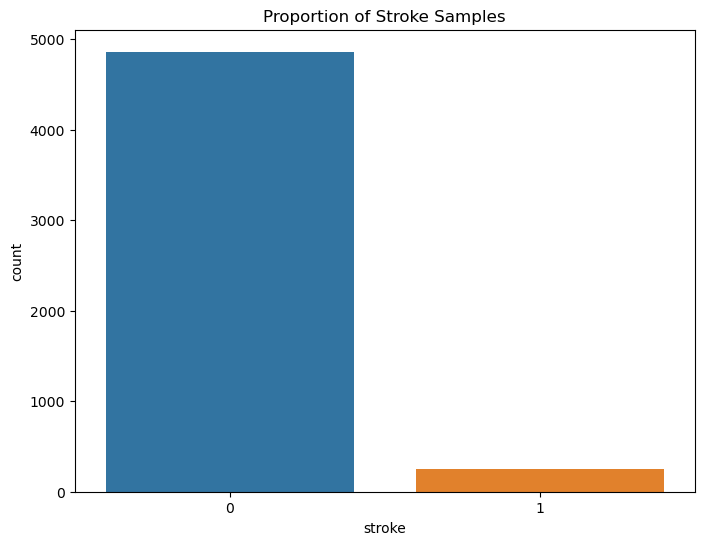

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=df)
plt.title('Proportion of Stroke Samples')
plt.show()

8. Visualize the Distribution of Male and Female Ages. Write the Observation.


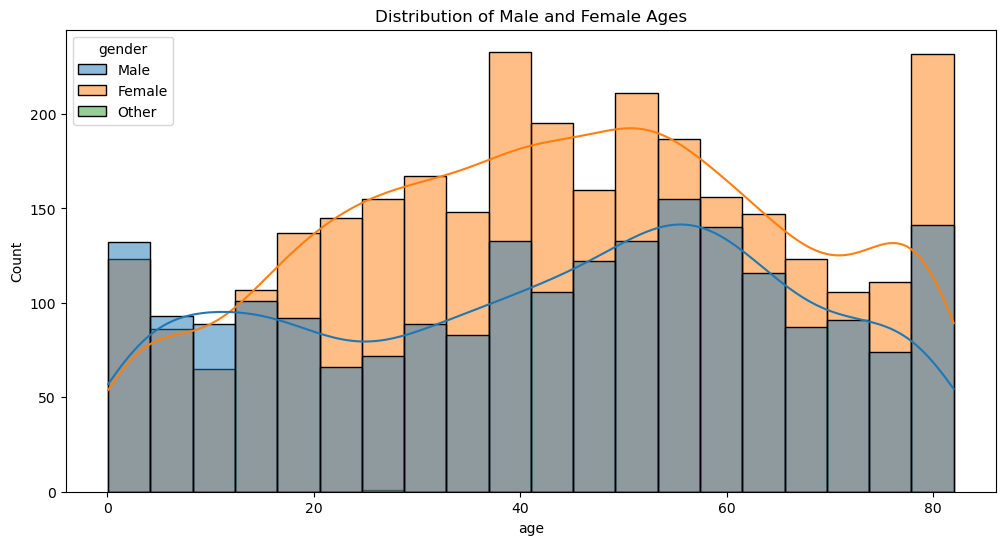

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='gender', kde=True, bins=20)
plt.title('Distribution of Male and Female Ages')
plt.show()

10.Visualize the stroke sample based on

a) BMI and Glucose Level

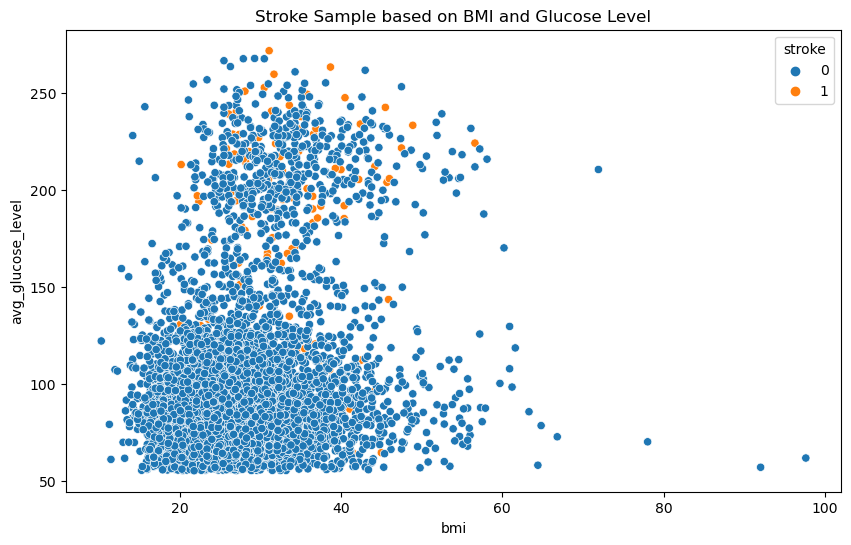

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='avg_glucose_level', hue='stroke')
plt.title('Stroke Sample based on BMI and Glucose Level')
plt.show()


b) BMI and Age

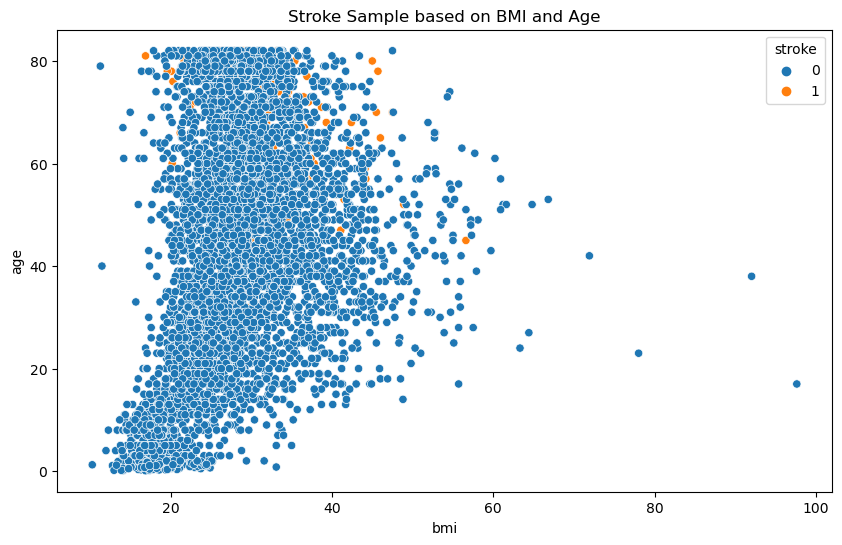

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='age', hue='stroke')
plt.title('Stroke Sample based on BMI and Age')
plt.show()

11. Using the pie chart visualizes the proportion of different smoking categories among the
stroke population.


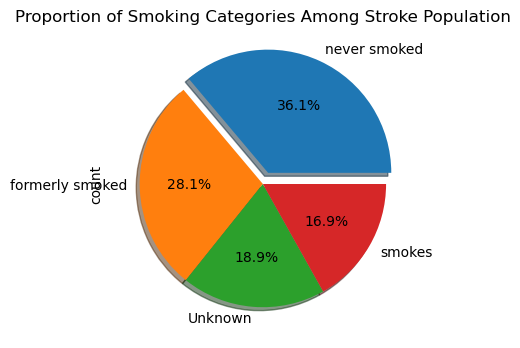

In [28]:
plt.figure(figsize=(6,4))
df[df['stroke'] == 1]['smoking_status'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0.1,0,0,0],shadow=True)
plt.title('Proportion of Smoking Categories Among Stroke Population')
plt.show()

In [29]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

12. Perform hypothesis testing to find the significant variables.


In [32]:
import scipy.stats as stats


In [33]:
# Separate continuous and categorical variables
continuous_vars = ['age', 'avg_glucose_level', 'bmi']
categorical_vars = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [34]:
# Perform hypothesis testing for continuous variables (t-test)
for var in continuous_vars:
    stroke_var = df[df['stroke'] == 1][var]
    no_stroke_var = df[df['stroke'] == 0][var]
    t_stat, p_value = stats.ttest_ind(stroke_var, no_stroke_var, nan_policy='omit')
    print(f"T-test for '{var}':")
    print("T-statistic:", t_stat)
    print("P-value:", p_value)
    print("")



T-test for 'age':
T-statistic: 18.08083426887953
P-value: 7.0307775129939774e-71

T-test for 'avg_glucose_level':
T-statistic: 9.513352175431471
P-value: 2.7678105194741054e-21

T-test for 'bmi':
T-statistic: 3.6713680501002486
P-value: 0.0002437202251405325



In [35]:
# Perform hypothesis testing for categorical variables (chi-square test)
for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['stroke'])
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test for '{var}':")
    print("Chi-square:", chi2)
    print("P-value:", p_value)
    print("")


Chi-square test for 'gender':
Chi-square: 0.47258662884530234
P-value: 0.7895490538408245

Chi-square test for 'hypertension':
Chi-square: 81.6053682482931
P-value: 1.661621901511823e-19

Chi-square test for 'heart_disease':
Chi-square: 90.25956125843324
P-value: 2.0887845685229236e-21

Chi-square test for 'ever_married':
Chi-square: 58.923890259034195
P-value: 1.6389021142314745e-14

Chi-square test for 'work_type':
Chi-square: 49.163511976675295
P-value: 5.397707801896119e-10

Chi-square test for 'Residence_type':
Chi-square: 1.0816367471627524
P-value: 0.29833169286876987

Chi-square test for 'smoking_status':
Chi-square: 29.147269191399264
P-value: 2.0853997025008455e-06



Based on the hypothesis testing results:

For continuous variables:

Age: The p-value is extremely low (close to 0), indicating a significant difference in age between individuals who had a stroke and those who did not. Therefore, age is likely a significant variable.

Average Glucose Level: The p-value is also very low, indicating a significant difference in average glucose levels between stroke and non-stroke individuals. This variable is likely significant.

BMI: The p-value is low but not as low as age and average glucose level, suggesting a less strong but still significant association with stroke.

For categorical variables:

Hypertension, heart disease, and ever married status: These variables all have very low p-values, indicating a significant association with stroke.

Work type and smoking status: These variables also have low p-values, suggesting they are likely significant predictors of stroke.

Gender and residence type: These variables have higher p-values, indicating they may not be as strongly associated with stroke.


In conclusion, age, average glucose level, hypertension, heart disease, ever married status, work type, and smoking status are likely significant variables in predicting stroke occurrence. Gender and residence type may not be as strongly associated with stroke.

13. Drop the unnecessary columns.


In [36]:
columns_to_drop = ['id', 'Residence_type']
df = df.drop(columns=columns_to_drop)

In [37]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,202.21,32.603242,never smoked,1
2,Male,80.0,0,1,Yes,Private,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,83.75,32.500627,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,166.29,25.600000,formerly smoked,0


14. Write the code to replace following categories columns in integer format as follow –

a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)

 

b) ever_married('Yes': 1, 'No': 0)

c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)

In [38]:
replace_map = {
    'work_type': {'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 1, 'Never_worked': -2},
    'ever_married': {'Yes': 1, 'No': 0},
    'smoking_status': {'never smoked': 0, 'Unknown': 1, 'formerly smoked': 2, 'smokes': -1}
}


In [39]:
df.replace(replace_map, inplace=True)

15. Check the distribution of 'bmi' and 'stroke' columns in the dataset.


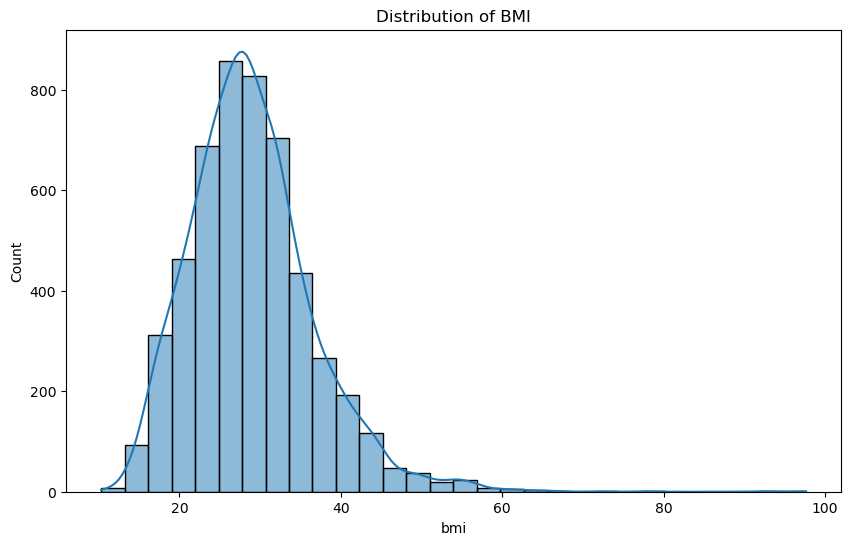

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', kde=True, bins=30)
plt.title('Distribution of BMI')
plt.show()

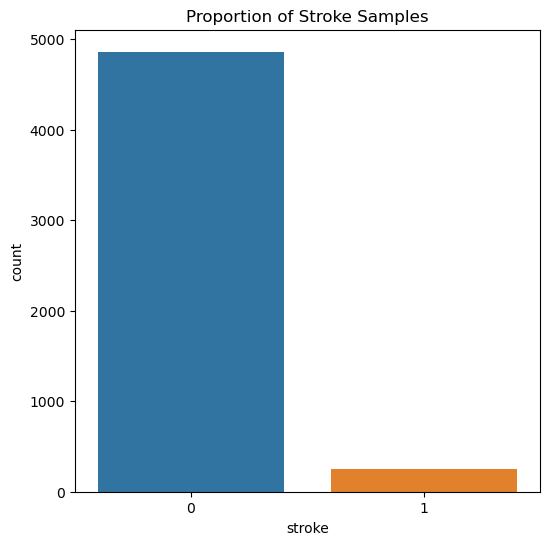

In [41]:
plt.figure(figsize=(6, 6))
sns.countplot(x='stroke', data=df)
plt.title('Proportion of Stroke Samples')
plt.show()

16. List down columns that are highly skewed.


In [43]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
skewed_cols = df[numeric_cols].skew().sort_values(ascending=False)

print("Highly skewed columns:")
print(skewed_cols[skewed_cols > 1])


Highly skewed columns:
stroke               4.193284
heart_disease        3.947244
hypertension         2.715392
avg_glucose_level    1.572284
bmi                  1.047537
dtype: float64


17. List down the columns that are highly kurtosis.


In [44]:
kurtosis_cols = df[numeric_cols].kurtosis().sort_values(ascending=False)

print("Highly kurtosis columns:")
print(kurtosis_cols[kurtosis_cols > 3])


Highly kurtosis columns:
stroke           15.589736
heart_disease    13.586052
hypertension      5.375456
bmi               3.511439
dtype: float64


18. Find the distribution of all variables with respect to the outcome 'stroke' variable.


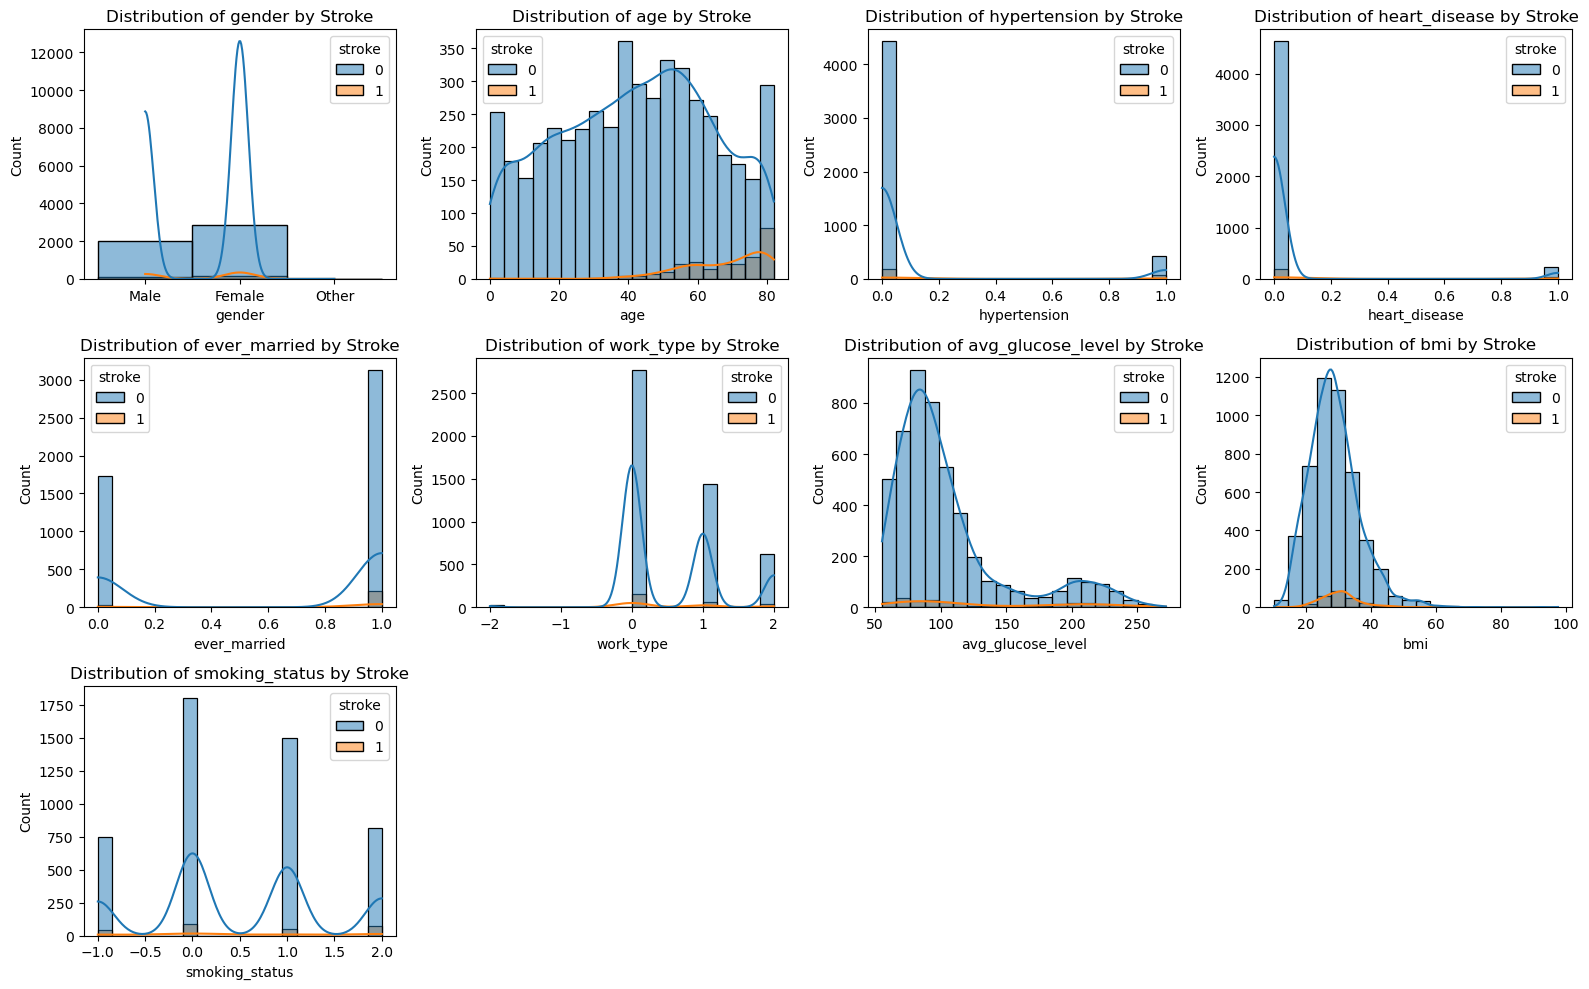

In [45]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i+1)
    sns.histplot(data=df, x=col, hue='stroke', kde=True, bins=20)
    plt.title(f'Distribution of {col} by Stroke')
plt.tight_layout()
plt.show()

19. Plot the heatmap for correlation matrix for the given dataset. Write the observation.

Especially note down columns that are highly correlated (Positive or negative correlation,
consider 0.7 to 1 as high)


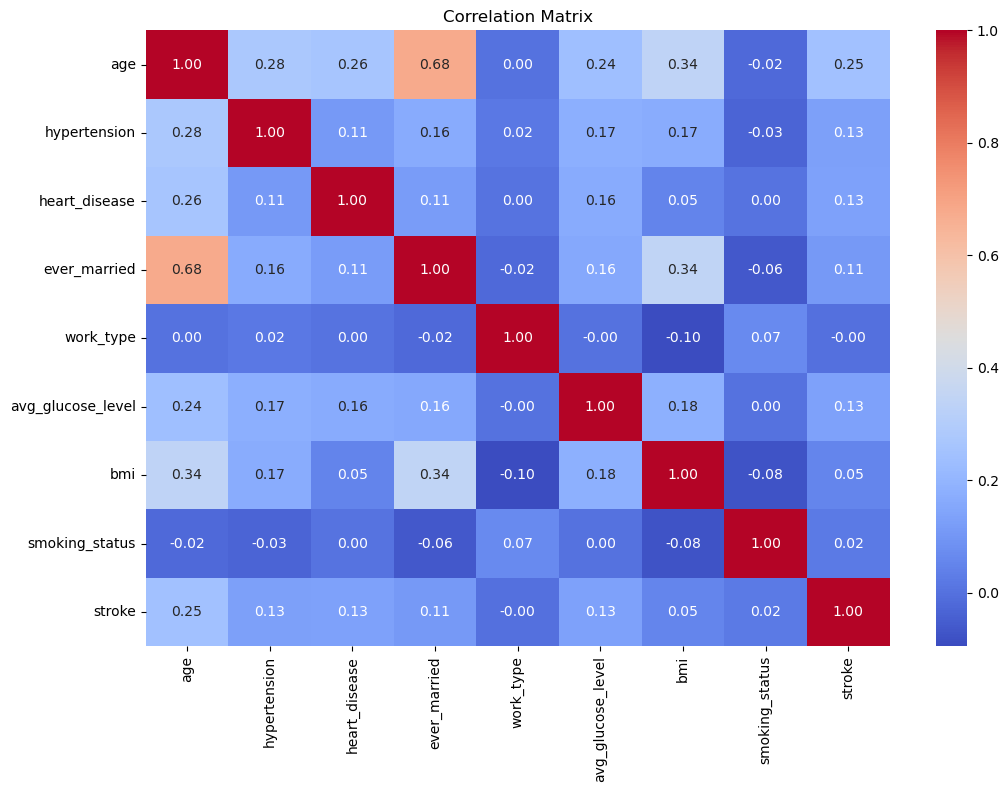

In [47]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

20. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio.


In [71]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [72]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories = [['Male', 'Female', 'Other']])

df['gender'] = oe.fit_transform(df[['gender']])

df['gender'].unique()

array([0., 1., 2.])

In [73]:
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)


21. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach
to balanced the dataset by using the correct technique.

In [74]:
print("Checking dataset balance:")
print(df['stroke'].value_counts())


Checking dataset balance:
stroke
0    4861
1     249
Name: count, dtype: int64


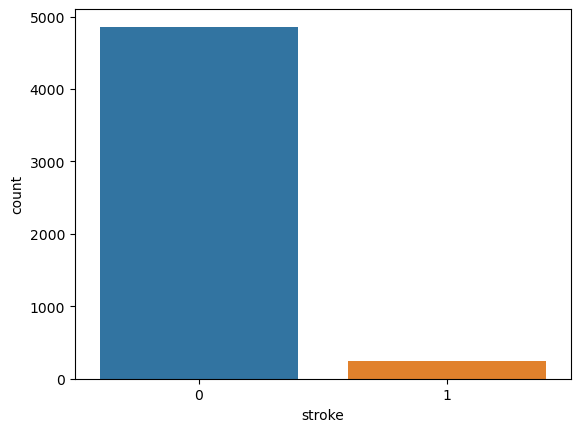

In [57]:
sns.countplot(x='stroke', data=df)
plt.show()

There is an imbalance of the data

22. Model Selection/hyperparameter tuning

- Try different models and fine tune their performance until you get the desired level of
performance on the given dataset.

 Model Evaluation
 
- Evaluate the models using appropriate evaluation metrics.

In [84]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

# Creating an empty list to store performance metrics
performance_data = []

def model_performance(model, name):
    # Predicting train and test values
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Calculating metrics
    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    kappa_train = cohen_kappa_score(y_train, pred_train)
    kappa_test = cohen_kappa_score(y_test, pred_test)

    # Appending metrics to our list
    performance_data.append({'Name': name,
                             'Train_Accuracy': acc_train,
                             'Test_Accuracy': acc_test,
                             'Train_f1score': f1_train,
                             'Test_f1score': f1_test,
                             'Train_Kappa': kappa_train,
                             'Test_Kappa': kappa_test})

    # Printing Classification report
    print('Train Report \n', classification_report(y_train, pred_train))
    print('Test Report \n', classification_report(y_test, pred_test))


In [85]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier().fit(X_train, y_train)
model_performance(model_dt, 'Decision Tree')
performance_df = pd.DataFrame(performance_data)


Train Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3393
           1       1.00      1.00      1.00       184

    accuracy                           1.00      3577
   macro avg       1.00      1.00      1.00      3577
weighted avg       1.00      1.00      1.00      3577

Test Report 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1468
           1       0.15      0.17      0.16        65

    accuracy                           0.92      1533
   macro avg       0.56      0.56      0.56      1533
weighted avg       0.93      0.92      0.93      1533



In [87]:
# RandomForest

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier().fit(X_train, y_train)

model_performance(model_rf , 'Random Forest')

Train Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3393
           1       1.00      0.99      1.00       184

    accuracy                           1.00      3577
   macro avg       1.00      1.00      1.00      3577
weighted avg       1.00      1.00      1.00      3577

Test Report 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1468
           1       0.00      0.00      0.00        65

    accuracy                           0.96      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.92      0.96      0.94      1533



In [88]:
# Naivebayes

from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB().fit(X_train, y_train)

model_performance(model_nb , 'Naive Bayes')

Train Report 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      3393
           1       0.16      0.40      0.23       184

    accuracy                           0.86      3577
   macro avg       0.56      0.64      0.57      3577
weighted avg       0.92      0.86      0.89      3577

Test Report 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      1468
           1       0.16      0.38      0.22        65

    accuracy                           0.89      1533
   macro avg       0.56      0.65      0.58      1533
weighted avg       0.94      0.89      0.91      1533



In [89]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier().fit(X_train, y_train)

model_performance(model_knn , 'KNN')

Train Report 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      3393
           1       0.51      0.11      0.19       184

    accuracy                           0.95      3577
   macro avg       0.73      0.55      0.58      3577
weighted avg       0.93      0.95      0.93      3577

Test Report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1468
           1       0.18      0.05      0.07        65

    accuracy                           0.95      1533
   macro avg       0.57      0.52      0.52      1533
weighted avg       0.93      0.95      0.94      1533



In [90]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

model_ab = AdaBoostClassifier().fit(X_train, y_train)

model_performance(model_ab , 'AdaBoost')

Train Report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3393
           1       0.50      0.01      0.01       184

    accuracy                           0.95      3577
   macro avg       0.72      0.50      0.49      3577
weighted avg       0.93      0.95      0.92      3577

Test Report 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1468
           1       1.00      0.02      0.03        65

    accuracy                           0.96      1533
   macro avg       0.98      0.51      0.50      1533
weighted avg       0.96      0.96      0.94      1533



In [91]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier().fit(X_train, y_train)

model_performance(model_gb , 'Gradient Boosting')

Train Report 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3393
           1       1.00      0.15      0.26       184

    accuracy                           0.96      3577
   macro avg       0.98      0.58      0.62      3577
weighted avg       0.96      0.96      0.94      3577

Test Report 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1468
           1       0.14      0.02      0.03        65

    accuracy                           0.95      1533
   macro avg       0.55      0.51      0.50      1533
weighted avg       0.92      0.95      0.94      1533



In [92]:
# XGBoost

from xgboost import XGBClassifier

model_xgb = XGBClassifier().fit(X_train, y_train)

model_performance(model_xgb , 'XGBoost')

Train Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3393
           1       1.00      0.95      0.97       184

    accuracy                           1.00      3577
   macro avg       1.00      0.97      0.99      3577
weighted avg       1.00      1.00      1.00      3577

Test Report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1468
           1       0.26      0.09      0.14        65

    accuracy                           0.95      1533
   macro avg       0.61      0.54      0.56      1533
weighted avg       0.93      0.95      0.94      1533



In [93]:
# Neural Network

from sklearn.neural_network import MLPClassifier

model_nn = MLPClassifier().fit(X_train, y_train)

model_performance(model_nn , 'Neural Network')

Train Report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3393
           1       0.33      0.01      0.01       184

    accuracy                           0.95      3577
   macro avg       0.64      0.50      0.49      3577
weighted avg       0.92      0.95      0.92      3577

Test Report 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1468
           1       0.00      0.00      0.00        65

    accuracy                           0.96      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.92      0.96      0.94      1533



In [96]:
performance_df = pd.DataFrame(performance_data)

In [97]:
performance_df

,Name,Train_Accuracy,Test_Accuracy,Train_f1score,Test_f1score,Train_Kappa,Test_Kappa
0,Decision Tree,1.000000,0.924984,1.000000,0.160584,1.000000,0.121429
1,Random Forest,0.999720,0.956947,0.997275,0.000000,0.997128,-0.001287
2,Naive Bayes,0.859100,0.885845,0.226994,0.222222,0.165359,0.172310
3,KNN,0.948840,0.950424,0.186667,0.073171,0.171128,0.056585
4,AdaBoost,0.948560,0.958252,0.010753,0.030303,0.009657,0.029055
5,Gradient Boosting,0.956388,0.954338,0.264151,0.027778,0.254015,0.019696
6,XGBoost,0.997204,0.950424,0.972067,0.136364,0.970597,0.116788
7,Neural Network,0.948281,0.956947,0.010695,0.000000,0.009060,-0.001287


Based on the metrics , the best model for this dataset appears to be the Random Forest model, as it has the highest test accuracy of 0.956947. However, it's important to note that the F1 score for the Random Forest model is 0.0, which indicates that the model may not be performing well in terms of predicting the minority class (if the dataset is imbalanced).

In [99]:
feature_importances = model_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

             Feature  Importance
6  avg_glucose_level    0.291478
7                bmi    0.257804
1                age    0.229363
8     smoking_status    0.069692
5          work_type    0.046913
0             gender    0.032553
2       hypertension    0.028954
3      heart_disease    0.023061
4       ever_married    0.020181


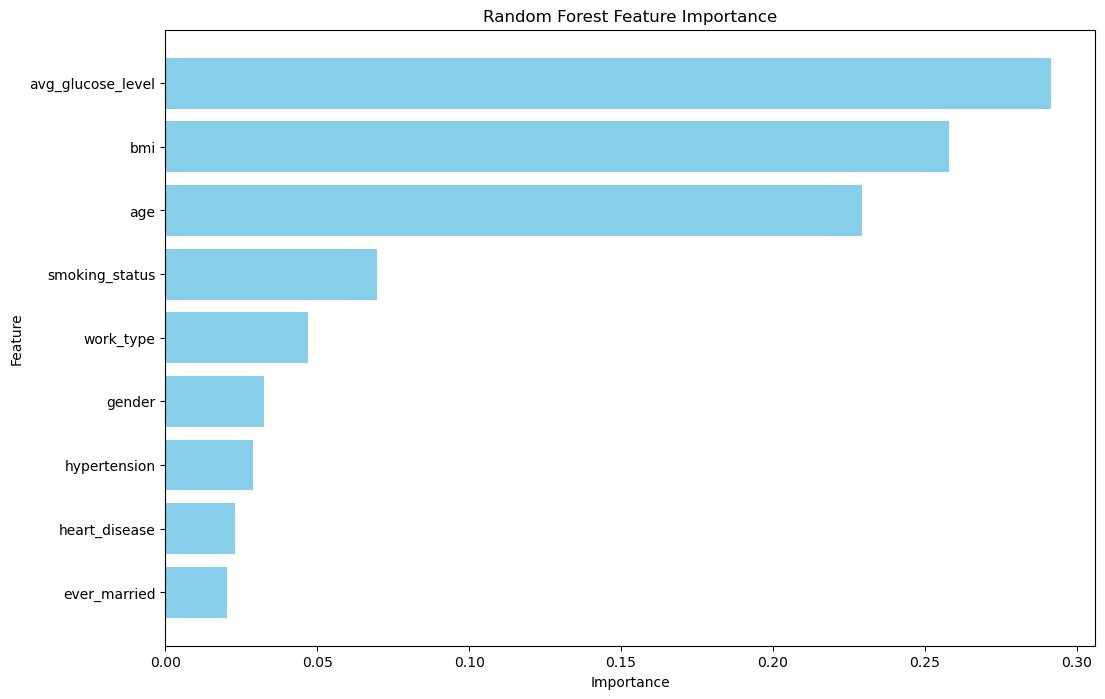

In [100]:
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  
plt.show()

The Random Forest model suggests that several variables have a significant impact on the likelihood of a stroke. Here's a breakdown of the most influential variables:

Average Glucose Level (avg_glucose_level): This variable has the highest importance, indicating that higher average glucose levels are associated with a higher likelihood of stroke. High glucose levels are a risk factor for diabetes, which is known to increase the risk of stroke.

BMI (bmi): BMI also plays a crucial role, suggesting that higher BMI values are associated with a higher likelihood of stroke. Obesity is a well-known risk factor for stroke, so this relationship aligns with existing medical knowledge.

Age (age): Age is a significant factor, indicating that older individuals are more likely to experience a stroke. This is consistent with the understanding that stroke risk increases with age due to factors like atherosclerosis and increased prevalence of other risk factors.

Smoking Status (smoking_status): The model indicates that smoking status is a significant predictor, with smokers being more likely to have a stroke. Smoking is a well-established risk factor for stroke due to its impact on blood pressure and the cardiovascular system.

Work Type (work_type): The type of work an individual does also appears to play a role. It's likely that certain occupations or lifestyles associated with specific work types may contribute to stroke risk through factors like stress, physical activity levels, and access to healthcare.

Gender (gender): Gender is also a factor, with the model suggesting that gender plays a role in stroke risk. This aligns with existing research showing that stroke incidence and outcomes can differ between men and women, possibly due to hormonal factors and lifestyle differences.

Hypertension, Heart Disease, and Ever Married Status: These variables also play a role, though to a lesser extent compared to the ones mentioned above. Hypertension and heart disease are known risk factors for stroke, while the relationship with marital status may be more complex and require further investigation.

In summary, the model suggests that factors like glucose levels, BMI, age, smoking status, work type, and gender are important predictors of stroke risk. These findings are in line with existing medical knowledge and highlight the importance of managing these risk factors to reduce the likelihood of stroke.